In [ ]:
import os
import json
import re
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Dict, Tuple, Optional

def plot_fitness_by_generation(directory_path: str, name_pattern: str, 
                               output_file: Optional[str] = None,
                               show_plot: bool = True) -> None:
    """
    Plot average, minimum, and maximum fitness values by generation for neural networks.
    
    Args:
        directory_path: Path to the directory containing the JSON files
        name_pattern: The pattern for the name part of the files (e.g., 'experiment1')
        output_file: Path to save the plot (optional)
        show_plot: Whether to display the plot
    """
    # Get all JSON files matching the pattern
    file_pattern = re.compile(rf"{name_pattern}_([0-9]+)\.json$")
    generation_data = {}
    
    # Collect all the files and their generation numbers
    for filename in os.listdir(directory_path):
        match = file_pattern.match(filename)
        if match:
            generation = int(match.group(1))
            file_path = os.path.join(directory_path, filename)
            generation_data[generation] = file_path
    
    if not generation_data:
        print(f"No files matching the pattern '{name_pattern}_X.json' found in {directory_path}")
        return
    
    # Sort generations in ascending order
    sorted_generations = sorted(generation_data.keys())
    
    avg_fitness = []
    min_fitness = []
    max_fitness = []
    
    # Extract fitness data for each generation
    for gen in sorted_generations:
        file_path = generation_data[gen]
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract all fitness values from this generation
        fitness_values = [genome["Fitness"] for genome in data.get("genomes", [])]
        
        if fitness_values:
            avg_fitness.append(np.mean(fitness_values))
            min_fitness.append(min(fitness_values))
            max_fitness.append(max(fitness_values))
        else:
            # Handle case where no fitness values are found
            print(f"Warning: No fitness values found in generation {gen}")
            avg_fitness.append(None)
            min_fitness.append(None)
            max_fitness.append(None)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot the data
    plt.plot(sorted_generations, avg_fitness, 'b-', label='Average Fitness')
    plt.plot(sorted_generations, min_fitness, 'r-', label='Minimum Fitness')
    plt.plot(sorted_generations, max_fitness, 'g-', label='Maximum Fitness')
    
    # Fill between min and max to show the range
    plt.fill_between(sorted_generations, min_fitness, max_fitness, alpha=0.2, color='gray')
    
    # Add labels and title
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title(f'Fitness Evolution Over Generations ({name_pattern})')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Save the plot if an output file is specified
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
    
    # Show the plot if requested
    if show_plot:
        plt.show()


<>:21: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\.'
C:\Users\St0pien\AppData\Local\Temp\ipykernel_26216\3571554499.py:21: SyntaxWarning: invalid escape sequence '\.'
  file_pattern = re.compile(f"{name_pattern}_([0-9]+)\.json$")


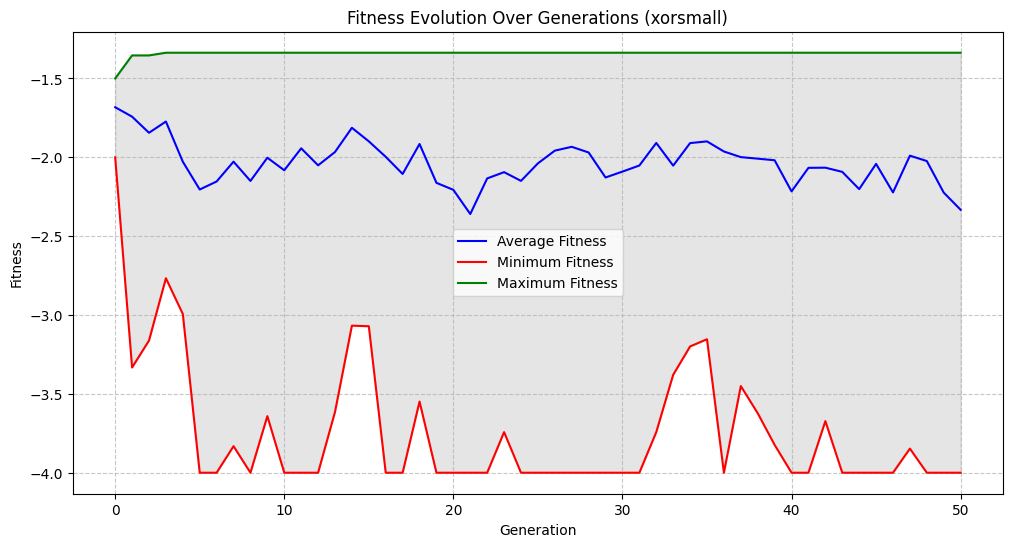

In [4]:
plot_fitness_by_generation("../data", "xorsmall")